# 15 - Eigendecompositions
- 15.1 Eigenwhatnow?
- 15.2 Finding eigenvalues
- 15.3 Finding eigenvectors
- 15.4 Diagonalization
- 15.5 Conditions for diagonalization
- 15.6 Distinct, repeated eigenvalues
- 15.7 Complex solutions
- 15.8 Symmetric matrices
- 15.9 Eigenvalues of singular matrices
- 15.10 Eigenlayers of a matrix
- 15.11 Matrix powers and inverse
- 15.12 Generalized eigendecomposition
- 15.13 Exercises
- 15.14 Answers
- 15.15 Code challenges
- 15.16 Code solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 15.1 What are eigenvalues and eigenvectors?
Eigendecomposition extracts eigenvalues (scalars) and eigenvectors from a **square** matrix.

The matrix-vector product of a matrix and eigenvector $A v$ is equivalent to the scalar-vector product $\lambda v$

$$
A v = \lambda v
$$

Notes
- The fact that $Av$ scales $v$ is unsual, most other matrix-vector products would rotate and scale the vector $v$.
- A $m \times m$ matrix will have $m$ eigenvalues.

## 15.2 Finding eigenvalues
The roots of the characteristic polynomial correspond to the eigenvalues of the matrix.

$$
\text{det}(A - \lambda I) = 0
$$

Example
$$
\text{det}\left(
\begin{bmatrix}
2 & 5 \\
6 & 3 \\
\end{bmatrix} - \lambda I\right) = 0 \\
\text{det}\left(
\begin{bmatrix}
2 - \lambda & 5 \\
6 & 3 - \lambda \\
\end{bmatrix} \right) = 0 \\
(2 - \lambda)(3 - \lambda) - 30 = 0 \\
\lambda^2 - 5 \lambda - 24 = 0 \\
(\lambda - 8) (\lambda + 3) = 0 \\
\lambda = +8, -3
$$

### Why This Works
The eigenvector is the vector in the nullspace of a matrix shifted by its eigenvalue.

$$
A v = \lambda v \\
A v - \lambda I v = 0 \\
(A - \lambda I) v = 0 \\
$$

Notes
- Shifted matrix $(A - \lambda I)$ must be singular in order for the nullspace to be non-empty. 

## 15.3 Finding eigenvectors
1. Find eigenvalues using the characteristic equation.
2. Each eigenvector $v_i$ associated with an eigenvalue $\lambda_i$ will be the vector in the null space of the matrix shifted by the eigenvalue. 

$$
(A - \lambda_i I) v_i = 0
$$

Example

Step 1. Find eigenvalues.
$$
\text{det}\left(
\begin{bmatrix}
1 & 2 \\
2 & 1 \\
\end{bmatrix} - \lambda I\right) = 0 \\
\text{det}\left(
\begin{bmatrix}
1 - \lambda & 2 \\
2 & 1 - \lambda \\
\end{bmatrix} \right) = 0 \\
\lambda^2 - 2 \lambda - 3 = 0 \\
(\lambda - 3) (\lambda + 1) = 0 \\
\lambda_1 = +3, \lambda_2 = -1
$$

Step 2. Find eigevectors.
$$
(A - \lambda_1 I) v_1 = 0 \\
\begin{bmatrix}
1 - 3 & 2 \\
2 & 1 - 3 \\
\end{bmatrix} v_1 = 0 \\
\begin{bmatrix}
-2 & 2 \\
2 & -2 \\
\end{bmatrix}
\begin{bmatrix}
1 \\
1 \\
\end{bmatrix} = 0 \\
v_1 = \begin{bmatrix}1 & 1\end{bmatrix}^T \\
$$

$$
(A - \lambda_2 I) v_2 = 0 \\
\begin{bmatrix}
1 + 1 & 2 \\
2 & 1 + 1 \\
\end{bmatrix} v_2 = 0 \\
\begin{bmatrix}
2 & 2 \\
2 & 2 \\
\end{bmatrix}
\begin{bmatrix}
1 \\
-1 \\
\end{bmatrix} = 0 \\
v_2 = \begin{bmatrix}1 & -1\end{bmatrix}^T \\
$$

## 15.4 Diagonalization
Eigendecompositions find a set of basis vectors for a matrix such that the matrix is diagonal to that basis.

The set of eigenvectors is arranged in the column matrix $V$ and left multiplied by the eigenvalues in the diagonal matrix $\Lambda$ (_capital $\lambda$_).

$$
A V = V \Lambda
$$

### Factorization of $A$ Using Eigendecomposition
The matrix $A$ can be factorized into the product of eigenvectors and eigenvalues.

$$
A = V \Lambda V^{-1}
$$

Notes
- $V^{-1}$ exists since the eigenvectors form a basis and are therefore linearly independent.
- Helpful to think of the eigendecomposition as revealing the structure of the matrix $A$.

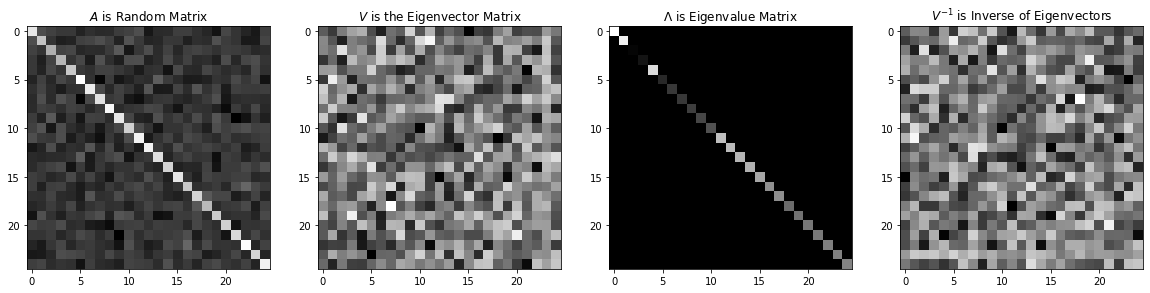

In [2]:
def rand_matrix_real_eigenvalues(n):
    """
    rand_matrix_real_eigenvalues returns a matrix of random values with real eigenvalues

    :param n: int            Size of a single dimension of the returned matrix.
    :return: numpy.ndarray   Symmetric matrix A = A^T
    """
    # Eigenvalues of a diagonal matrix are the elements on diagonal.
    # Generate n real-valued eigenvalues.
    D = np.diag(np.random.random(n))
    # Generate a random orthogonal matrix.
    Q, _ = np.linalg.qr(np.random.random((n,n)))
    # Compute the matrix similarity transform from D to B.
    B = Q @ D @ Q.T
    return B


n = 25
A = rand_matrix_real_eigenvalues(n)

L, V = np.linalg.eig(A)
L = np.diag(L)
Vinv = np.linalg.inv(V)

# Verify the factorization of A = V Lambda V^-1.
np.testing.assert_almost_equal(V @ L @ Vinv, A)

# Plot the original matrix and components of factorization.
fig1, axes = plt.subplots(1, 4, figsize=(20,6))
axes[0].imshow(A, cmap='gray')
axes[0].set_title('$A$ is Random Matrix')
axes[1].imshow(V, cmap='gray')
axes[1].set_title('$V$ is the Eigenvector Matrix')
axes[2].imshow(L, cmap='gray')
axes[2].set_title('$\\Lambda$ is Eigenvalue Matrix')
axes[3].imshow(Vinv, cmap='gray')
axes[3].set_title('$V^{-1}$ is Inverse of Eigenvectors')
plt.show()

## 15.5 Conditions for diagonalization

## 15.6 Distinct, repeated eigenvalues

## 15.7 Complex solutions

## 15.8 Symmetric matrices

## 15.9 Eigenvalues of singular matrices

## 15.10 Eigenlayers of a matrix

## 15.11 Matrix powers and inverse

## 15.12 Generalized eigendecomposition

## 15.15 Code challenges